In [1]:
#Winning Factor 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

print('Import Done')


Import Done


In [2]:
df = pd.read_csv(r"C:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\EDA\Mercedes_Feature_Table.csv", sep=';')
print("Feature_Table:", df.columns.tolist())

#Encode categorical columns
df['LOCATION_CODE'] = pd.factorize(df['LOCATION'])[0]
df['COUNTRY_CODE'] = pd.factorize(df['COUNTRY'])[0]
df['DRIVER_NATIONALITY_CODE'] = pd.factorize(df['DRIVER_NATIONALITY'])[0]

print(df[['LOCATION', 'LOCATION_CODE', 'COUNTRY', 'COUNTRY_CODE', 'DRIVER_NATIONALITY', 'DRIVER_NATIONALITY_CODE']].head())


Feature_Table: ['CONSTRUCTOR_NAME', 'DRIVERID', 'DRIVER_NAME', 'DRIVER_NATIONALITY', 'ROUND', 'SEASON', 'CIRCUIT', 'CIRCUIT_NAME', 'LOCATION', 'COUNTRY', 'GRID', 'POSITION', 'STATUS', 'POINTS', 'LAPS', 'TIME', 'TIME_IN_MILLISECONDS', 'Q1_IN_MILLISECONDS', 'Q2_IN_MILLISECONDS', 'Q3_IN_MILLISECONDS', 'PIT_COUNT', 'AVG_PIT_DURATION', 'TOTAL_PIT_TIME']
       LOCATION  LOCATION_CODE   COUNTRY  COUNTRY_CODE DRIVER_NATIONALITY  \
0  Kuala Lumpur              0  Malaysia             0             German   
1      Shanghai              1     China             1             German   
2      Shanghai              1     China             1             German   
3      Istanbul              2    Turkey             2             German   
4      Istanbul              2    Turkey             2             German   

   DRIVER_NATIONALITY_CODE  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  


In [3]:
numeric_df = df.select_dtypes(include='number')
numeric_df = numeric_df.fillna(numeric_df.mean())


numeric_df

,DRIVERID,ROUND,SEASON,CIRCUIT,GRID,POSITION,POINTS,LAPS,TIME_IN_MILLISECONDS,Q1_IN_MILLISECONDS,Q2_IN_MILLISECONDS,Q3_IN_MILLISECONDS,PIT_COUNT,AVG_PIT_DURATION,TOTAL_PIT_TIME,LOCATION_CODE,COUNTRY_CODE,DRIVER_NATIONALITY_CODE
0,30,2,2011,2,11,9,2.0,56,5944728,3064000.0,2.255000e+06,2.020328e+06,3,22.3547,67.064,0,0,0
1,3,3,2011,17,4,5,10.0,56,5831674,2372000.0,2.950000e+06,2.710000e+06,3,21.1653,63.496,1,1,0
2,30,3,2011,17,14,8,4.0,56,5849252,2608000.0,2.617000e+06,2.020328e+06,3,21.2953,63.886,1,1,0
3,3,4,2011,5,3,5,10.0,58,5465097,2134000.0,2.301000e+06,2.074000e+06,4,21.1893,84.757,2,2,0
4,30,4,2011,5,8,12,0.0,58,5503002,2317000.0,1.681000e+06,2.206000e+06,4,23.0162,92.065,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,1,22,2024,80,10,2,18.0,50,4933282,2205000.0,2.487000e+06,2.986000e+06,2,21.2110,42.422,34,29,1
481,847,23,2024,78,1,4,12.0,57,5479427,1501000.0,1.329000e+06,1.775000e+06,4,29.2448,116.979,31,27,1
482,1,23,2024,78,6,12,0.0,57,5521445,1897000.0,1.355000e+06,1.271000e+06,4,27.7118,110.847,31,27,1
483,1,24,2024,24,16,4,12.0,58,5229774,2267000.0,2.078825e+06,2.020328e+06,1,21.6940,21.694,11,11,1


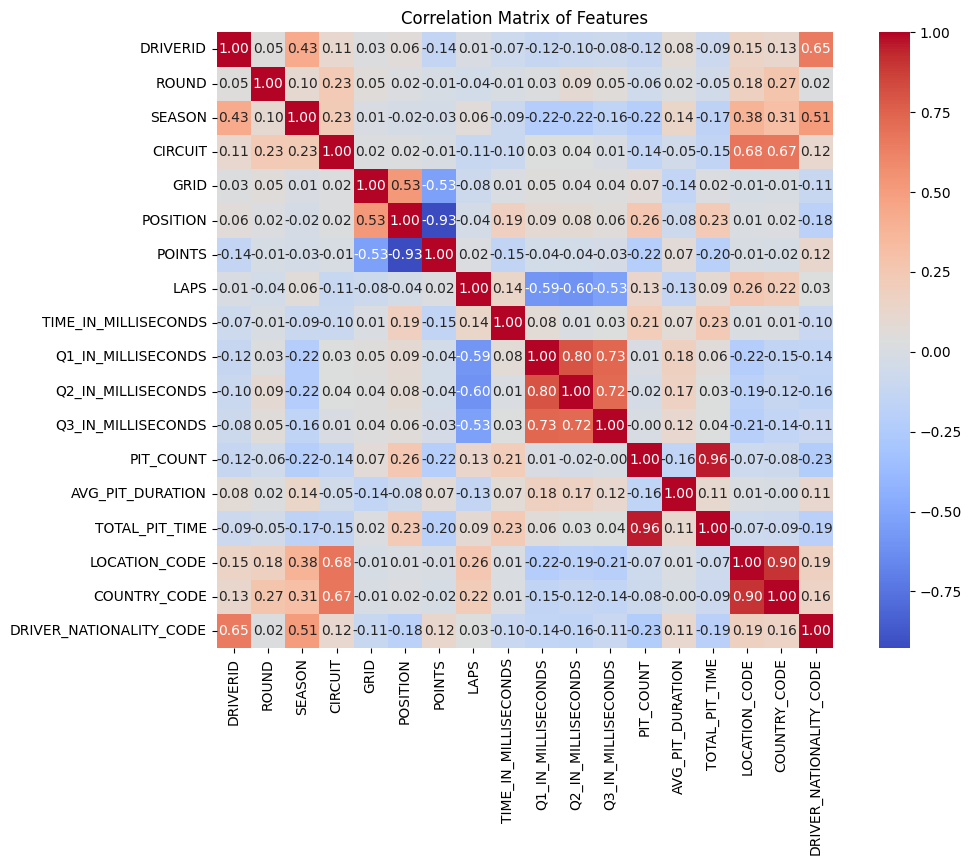

In [4]:
#Correlation matrix
corr = numeric_df.corr()

#Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Features")
plt.show()


In [9]:
y = numeric_df['POSITION'].apply(lambda x: 1 if x == 1 else 0)  #1 meaning the driver won

features = [
    "GRID",
    "Q3_IN_MILLISECONDS",
    "PIT_COUNT",
    "AVG_PIT_DURATION",
    "TIME_IN_MILLISECONDS",
    "LOCATION_CODE",
    "COUNTRY_CODE",
    "DRIVER_NATIONALITY_CODE",
    "SEASON"
]

X = numeric_df[features]

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
log = LogisticRegression(max_iter=1000)
svc = SVC(probability=True)


In [11]:
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('log', log),
        ('svc', svc)
    ],
    voting='soft'  
)

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)


In [12]:
print("Voting Ensemble Model Performance:\n")
print(classification_report(y_test, y_pred))


Voting Ensemble Model Performance:

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       110
           1       0.68      0.42      0.52        36

    accuracy                           0.81       146
   macro avg       0.76      0.68      0.70       146
weighted avg       0.79      0.81      0.79       146



In [14]:
for name, model in [('Random Forest', rf), ('Gradient Boosting', gb), ('Logistic Regression', log), ('SVC', svc)]:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name}:\n")
    print(classification_report(y_test, preds))



Random Forest:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.66      0.53      0.58        36

    accuracy                           0.82       146
   macro avg       0.75      0.72      0.73       146
weighted avg       0.81      0.82      0.81       146


Gradient Boosting:

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.52      0.47      0.49        36

    accuracy                           0.76       146
   macro avg       0.67      0.66      0.67       146
weighted avg       0.75      0.76      0.76       146


Logistic Regression:

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       110
           1       0.67      0.56      0.61        36

    accuracy                           0.82       146
   macro avg       0.76      0.73      0.75       146
weighted avg 

c:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\datathon\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\datathon\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\datathon\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 